# Project 4- Data Wrangling and Cleaning

## Introudction

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

The tasks in this project are as follows:

- Data wrangling, which consists of:
   - Gathering data 
   - Assessing data
   - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
  - Reporting on data wrangling efforts and 
  - Data Analysis and Visualizations

## Gathering Data

In [50]:
# importing the required library

import requests 
import numpy as np 
import pandas as pd 
import tweepy 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 

### Source 1: The WeRateDogs Twitter archive

In [51]:
TwitterArchive_df=pd.read_csv('twitter-archive-enhanced.csv')
TwitterArchive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Source 2 - image-predictions.tsv

In [52]:
# get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Source 3 - Twitter data (API) provided by Udacity

In [53]:
# load twitter API data
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


## Assessing Data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues

#### Source 1

In [54]:
TwitterArchive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Below are the list of variables from the data source:

- tweet_id: the unique identifier for each tweet
- in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- timestamp: time when this Tweet was created
- source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- text: actual UTF-8 text of the status update
- retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- retweeted_status_timestamp: time of retweet
- expanded_urls: tweet URL
- rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
- rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- name: name of the dog
- doggo: one of the 4 dog "stage"
- floofer: one of the 4 dog "stage"
- pupper: one of the 4 dog "stage"
- puppo: one of the 4 dog "stage"

In [55]:
TwitterArchive_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Pip          1
Horace       1
Rilo         1
Angel        1
Siba         1
Name: name, Length: 957, dtype: int64

There are some redundancy in the names columns, some of the field are updated as None.

In [56]:
TwitterArchive_df.shape

(2356, 17)

In [57]:
TwitterArchive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [58]:
TwitterArchive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [59]:
TwitterArchive_df.duplicated().sum()

0

In [60]:
# check rating denominator
TwitterArchive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [61]:
# check ratings with denominator greather than 10
TwitterArchive_df[TwitterArchive_df.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the flo...,70
784,"RT @dog_rates: After so many requests, this is...",11
902,Why does this never happen at my front door......,150
1068,"After so many requests, this is Bretagne. She ...",11
1120,Say hello to this unbelievably well behaved sq...,170
1165,Happy 4/20 from the squad! 13/10 for all https...,20
1202,This is Bluebert. He just saw that both #Final...,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,Here's a brigade of puppers. All look very pre...,80


In [62]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


tweet image predictions columns:

- tweet_id: the unique identifier for each tweet
- jpg_url: dog's image URL
- img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- p1: algorithm's #1 prediction for the image in the tweet
- p1_conf: how confident the algorithm is in its #1 prediction
- p1_dog: whether or not the #1 prediction is a breed of dog
- p2: algorithm's #2 prediction for the image in the tweet
- p2_conf: how confident the algorithm is in its #2 prediction
- p2_dog: whether or not the #2 prediction is a breed of dog
- p3: algorithm's #3 prediction for the image in the tweet
- p3_conf: how confident the algorithm is in its #3 prediction
- p3_dog: whether or not the #3 prediction is a breed of dog

In [63]:
image_prediction_df.shape

(2075, 12)

In [64]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [66]:
image_prediction_df.duplicated().sum()

0

In [67]:

image_prediction_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [68]:
image_prediction_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [69]:
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


status_df (tweet status) columns:

- id: the unique identifier for each tweet
- retweets: number of times this Tweet has been retweeted
- favorites: indicates approximately how many times this Tweet has been liked by Twitter users

In [70]:
twitter_api.shape

(2354, 2)

In [71]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


In [72]:
twitter_api.describe()

,favorites,retweets
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


In [73]:
twitter_api.duplicated().sum()

1

### Action for Quality & Tidiness Issues

- Remove the columns which will not be in analysis.
- Take care of the values whose denominator is greater than 10
- The timestamp has an incorrect datatype - is an object, should be DateTime.
- Remove replies to the tweets which is mistakenly access as tweet
- Remove retweets mistakenly taken as tweets
- One column for Dog classification(doggo, floofer, pupper or puppo)
- Join tables twitter_archive, image_predictions, and twitter_API
- Columns 'source' and 'expanded urls' repeat except for tweet id and may not be necessaryimage_prediction_df

## Cleaning Data

#### Source 1

In [80]:
## Creating copy of all the data frame
TwitterArchive_Copy = TwitterArchive_df.copy
image_prediction_Copy = image_prediction_df.copy
twitter_api_Copy = twitter_api.copy

In [83]:
TwitterArchive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [84]:
## Dropping unnecessary columns from twitter archive dataset
TwitterArchive_df = TwitterArchive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                            'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [85]:
TwitterArchive_df = TwitterArchive_df.drop(['source', 'expanded_urls'], axis=1)

In [88]:
## Creating one column for Dog classification(doggo, floofer, pupper or puppo)
TwitterArchive_df['dogstage'] = 'None'
for index in TwitterArchive_df.index:
    if TwitterArchive_df.doggo[index] == 'doggo':
        TwitterArchive_df.at[index, 'dogstage'] = 'doggo'
    elif TwitterArchive_df.floofer[index] == 'floofer':
        TwitterArchive_df.at[index, 'dogstage'] = 'floofer'
    elif TwitterArchive_df.pupper[index] == 'pupper':
        TwitterArchive_df.at[index, 'dogstage'] = 'pupper'
    elif TwitterArchive_df.puppo[index] == 'puppo':
        TwitterArchive_df.at[index, 'dogstage'] = 'puppo'

In [89]:
TwitterArchive_df.dogstage.value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dogstage, dtype: int64

In [90]:
# Dropping the additional columns 
TwitterArchive_df = TwitterArchive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [91]:
# Change the data ype of timestamp
TwitterArchive_df['timestamp'] = TwitterArchive_df['timestamp'].str[:10]

TwitterArchive_df['timestamp'] = pd.to_datetime(TwitterArchive_df['timestamp'], format="%Y/%m/%d")

In [93]:
TwitterArchive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   text                2356 non-null   object        
 3   rating_numerator    2356 non-null   int64         
 4   rating_denominator  2356 non-null   int64         
 5   name                2356 non-null   object        
 6   dogstage            2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 129.0+ KB


#### Source 2

In [95]:
image_prediction_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [97]:
# Creating additional columns for prediction 
image_prediction_df['prediction'] = None

for dog in image_prediction_df.index:
    if image_prediction_df.p1_dog[dog] == True:
        image_prediction_df.loc[dog, 'prediction'] = image_prediction_df.p1[dog]
    elif image_prediction_df.p1_dog[dog] == False:
        if image_prediction_df.p2_dog[dog] == True:
            image_prediction_df.loc[dog, 'prediction'] = image_prediction_df.p2[dog]
        elif image_prediction_df.p2_dog[dog] == False:
            if image_prediction_df.p3_dog[dog] == True:
                image_prediction_df.loc[dog, 'prediction'] = image_prediction_df.p3[dog]

In [98]:
image_prediction_df = image_prediction_df.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 
                                                       'p3_conf', 'p3_dog'], axis=1)

In [99]:
image_prediction_df.head()

,tweet_id,jpg_url,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


In [122]:
## Merging all the three dataset
Final_df= pd.merge(TwitterArchive_df, twitter_api, on = "tweet_id", how = "inner")

In [123]:
Final_df=pd.merge(Final_df, image_prediction_df, on = "tweet_id", how = "inner")

In [124]:
Final_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,favorites,retweets,jpg_url,prediction
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


In [125]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2073 non-null   int64         
 1   timestamp           2073 non-null   datetime64[ns]
 2   text                2073 non-null   object        
 3   rating_numerator    2073 non-null   int64         
 4   rating_denominator  2073 non-null   int64         
 5   name                2073 non-null   object        
 6   dogstage            2073 non-null   object        
 7   favorites           2073 non-null   int64         
 8   retweets            2073 non-null   int64         
 9   jpg_url             2073 non-null   object        
 10  prediction          1750 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 194.3+ KB


In [126]:
Final_df= Final_df.dropna(axis=0,how='any')

In [127]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 1 to 2072
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1750 non-null   int64         
 1   timestamp           1750 non-null   datetime64[ns]
 2   text                1750 non-null   object        
 3   rating_numerator    1750 non-null   int64         
 4   rating_denominator  1750 non-null   int64         
 5   name                1750 non-null   object        
 6   dogstage            1750 non-null   object        
 7   favorites           1750 non-null   int64         
 8   retweets            1750 non-null   int64         
 9   jpg_url             1750 non-null   object        
 10  prediction          1750 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 164.1+ KB


In [128]:
Final_df['start_month'] = Final_df['timestamp'].dt.strftime('%m')
Final_df['weekday']     = Final_df['timestamp'].dt.strftime('%a')
Final_df['start_hour']  = Final_df['timestamp'].dt.strftime('%H')

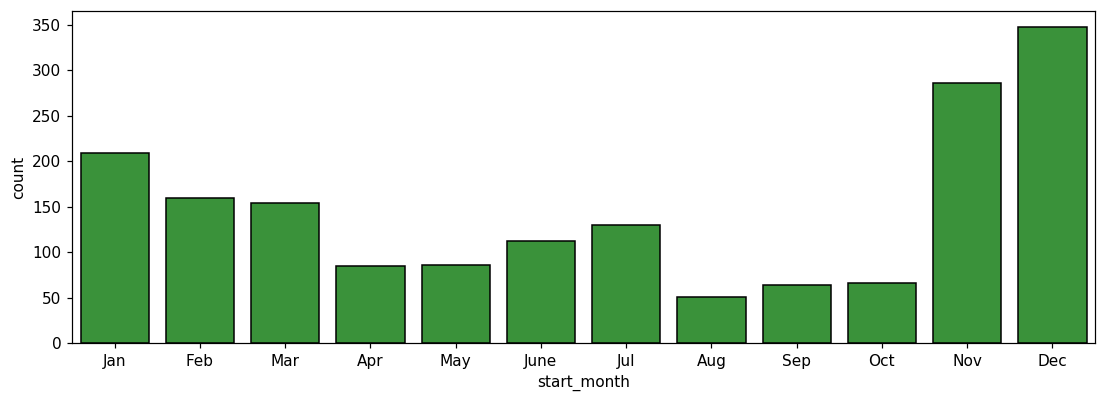

In [129]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
sns.countplot(data= Final_df,x='start_month',color= sns.color_palette()[2],edgecolor = "black");
ax.set(xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul","Aug","Sep","Oct","Nov","Dec"]);

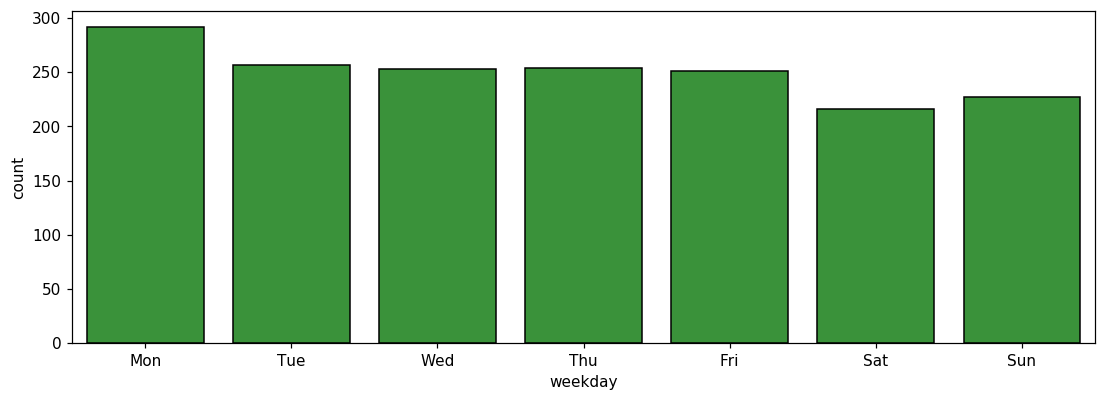

In [163]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
gen_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data= Final_df,x='weekday',color= sns.color_palette()[2],edgecolor = "black",order=gen_order);

None       1480
pupper      172
doggo        69
puppo        22
floofer       7
Name: dogstage, dtype: int64

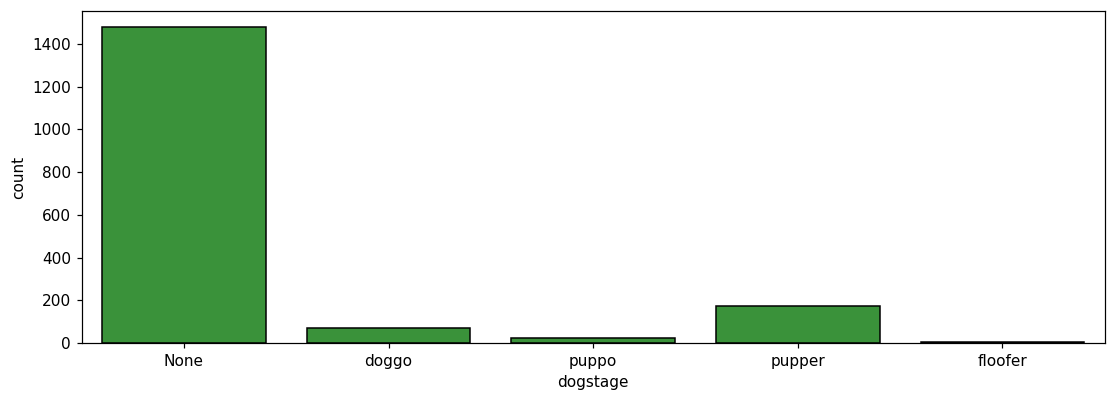

In [130]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
sns.countplot(data= Final_df,x='dogstage',color= sns.color_palette()[2],edgecolor = "black", );
Final_df['dogstage'].value_counts()

In [133]:
Top10dogs = Final_df.prediction.value_counts()[0:11]
Top10dogs

golden_retriever      173
Labrador_retriever    113
Pembroke               95
Chihuahua              95
pug                    65
toy_poodle             52
chow                   51
Samoyed                46
Pomeranian             42
malamute               34
cocker_spaniel         34
Name: prediction, dtype: int64

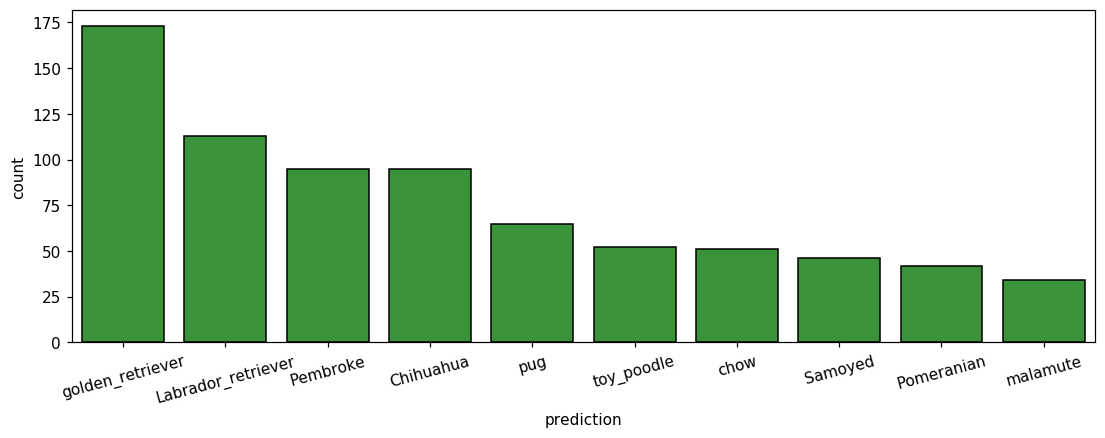

In [148]:
gen_order=Final_df['prediction'].value_counts().index[0:10]
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
sns.countplot(data= Final_df,x='prediction',color= sns.color_palette()[2],edgecolor = "black",order=gen_order);
plt.xticks(rotation=15);

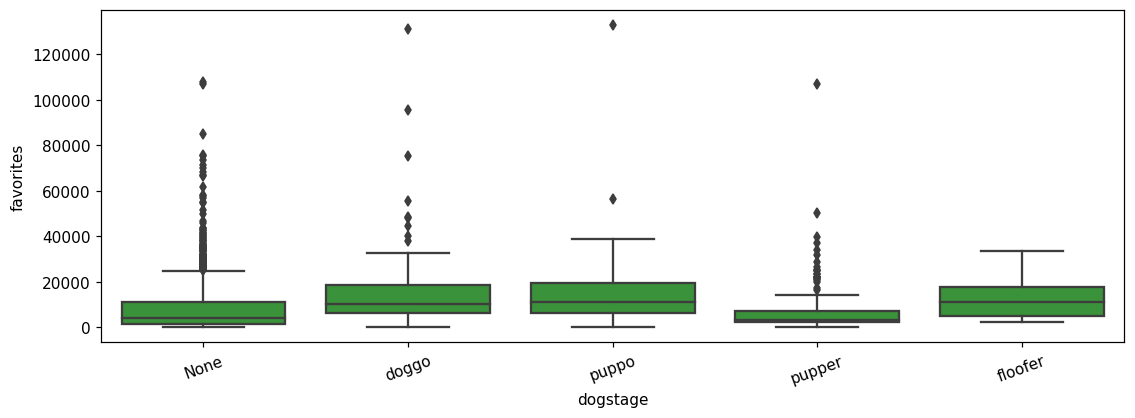

In [161]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
base_color=sns.color_palette()[2]
sns.boxplot(data=Final_df,x='dogstage',y='favorites',color=base_color);
plt.xticks(rotation=20);

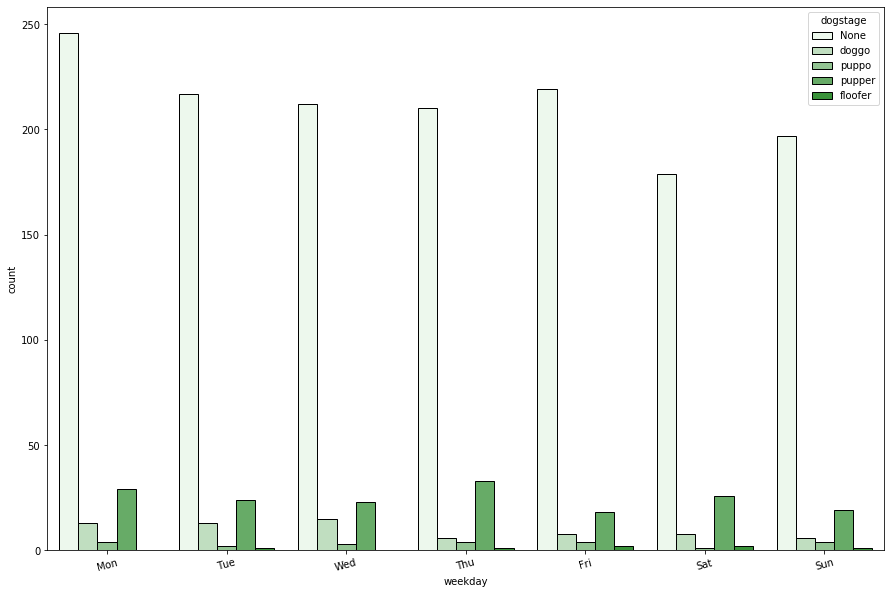

In [165]:
# for cluster bar chart we need to just add one more parameter
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(data=Final_df,x='weekday',hue='dogstage',order=gen_order,edgecolor = "black",color= sns.color_palette()[2])
plt.xticks(rotation=15);